# Cognifyz level 3 Task 1 Predictive Modeling


In [16]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
##Downloading the dataset and converting it into data frame


df = pd.read_csv ('/content/drive/MyDrive/data/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [20]:
df.shape

(9551, 21)

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [32]:
null_values = df.isnull().sum() #check for null values in each column
print(null_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#Cleaning the table and make sure there is no Null Values

In [33]:
df=df.dropna()

null_values = df.isnull().sum() #check for null values in each column
print(null_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#Doing OneHot Encoding For the required columns and seperating the data to Test and Train Data

In [34]:


# Handle missing values (drop rows with missing target variable)
df = df.dropna(subset=['Aggregate rating'])

# Encode categorical variables
label_encoders = {}
for column in ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select features and target variable
features = ['City', 'Cuisines', 'Longitude', 'Latitude', 'Average Cost for two', 'Currency',
            'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu',
            'Price range', 'Votes']
X = df[features]
y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Prediction Using Linear Regression Model

Linear Regression - MSE: 1.6402600821463666, R2: 0.27935784748016856


Text(0, 0.5, 'Predicted Ratings')

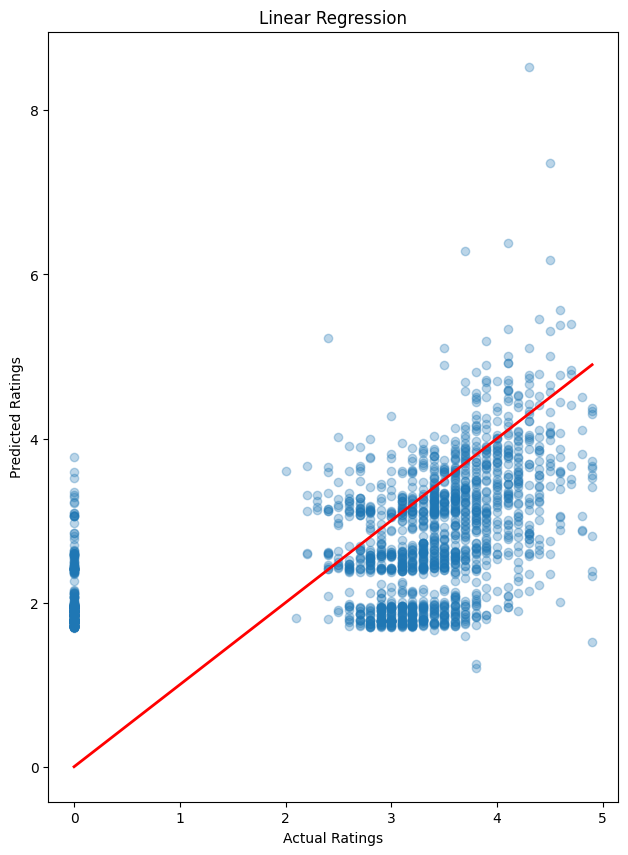

In [35]:
# Train and evaluate Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print(f'Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lin)}, R2: {r2_score(y_test, y_pred_lin)}')



# Visualize the performance of the models
plt.figure(figsize=(25,10 ))

# Scatter plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')





The mean square error is high and the accuracy of the model is also very poor so we may not proceed with this model further and there are more out liers

## Prediction Using Decision Tree Regressor Model

Decision Tree - MSE: 0.1735688121402407, R2: 0.9237431894170233


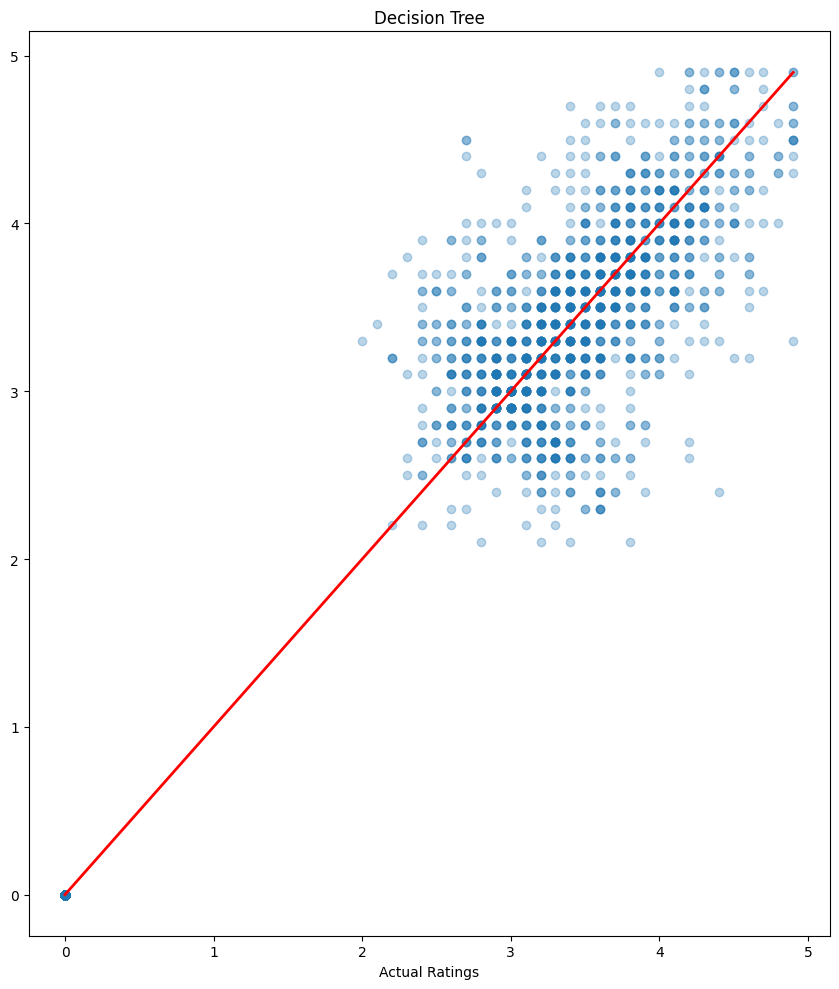

In [36]:
# Train and evaluate Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print(f'Decision Tree - MSE: {mean_squared_error(y_test, y_pred_dt)}, R2: {r2_score(y_test, y_pred_dt)}')


# Visualize the performance of the models
plt.figure(figsize=(25,10 ))


# Scatter plot for Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title('Decision Tree')
plt.xlabel('Actual Ratings')

plt.tight_layout()
plt.show()


This model performs well as there is very less outliers and the model acciracy is 92%

# Prediction Using Random Forest Regressor Model

Random Forest - MSE: 0.08797177289377286, R2: 0.9613499295208129


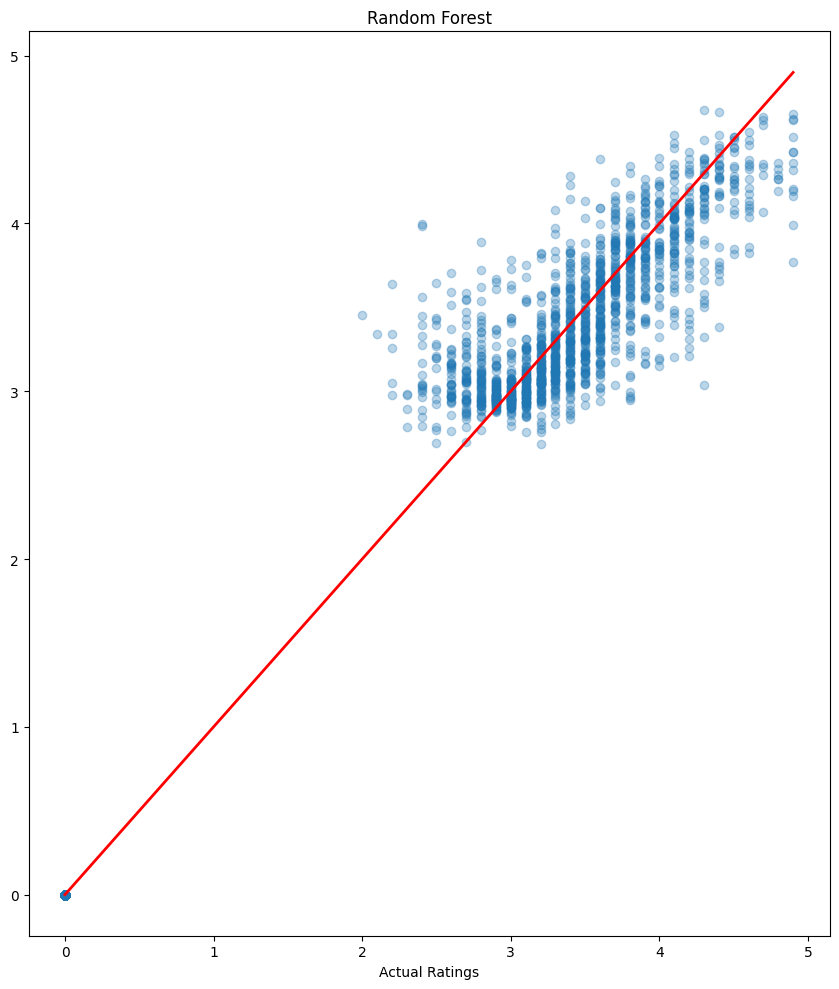

In [38]:
# Train and evaluate Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print(f'Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf)}, R2: {r2_score(y_test, y_pred_rf)}')

# Visualize the performance of the models
plt.figure(figsize=(25,10 ))

# Scatter plot for Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title('Random Forest')
plt.xlabel('Actual Ratings')

plt.tight_layout()
plt.show()

The accuracy of the model is too high 96%  which is very good so we can use this model to predict the feature also

#From the above all models we can clearly see Random Forest Regressor Model we can get the best output